# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('output/q5_cleaned_data.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


In [2]:
df.head()

,patient_id,age,sex,bmi,enrollment_date,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,site,intervention_group,follow_up_months,adverse_events,outcome_cvd,adherence_pct,dropout
0,P00001,80,F,29.3,2022-05-01,123.0,80.0,120.0,55.0,41.0,118.0,site b,Control,20,0,No,24.0,No
1,P00002,80,Female,26.0,2022-01-06,139.0,81.0,206.0,58.0,107.0,79.0,Site A,CONTROL,24,0,No,77.0,No
2,P00003,82,Female,26.0,2023-11-04,123.0,86.0,172.0,56.0,82.0,77.0,SITE C,treatment b,2,0,Yes,70.0,No
3,P00004,95,Female,25.4,2022-08-15,116.0,77.0,200.0,56.0,104.0,115.0,Site D,treatment b,17,0,No,62.0,No
4,P00005,95,M,26.0,2023-04-17,97.0,71.0,185.0,78.0,75.0,113.0,site e,Treatmen A,9,0,yes,62.0,Yes


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [3]:
# TODO: Group by site
# Group by 'site' and calculate mean of age, BMI, and blood pressure
string_columns = ['sex','site', 'intervention_group', 'outcome_cvd', 'dropout']
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip().str.lower())

df_clean = df.replace({"f": "female", "m": "female", 
                "treatmen a": "treatment a", "treatmenta": "treatment a",
                "treatment  b": "treatment b",
                "contrl": "control",
                "site  a": "site a",
                "site_d": "site d"
                                    })
site_summary = (
    df_clean.groupby('site')[['age', 'bmi', 'systolic_bp']]
      .mean()
      .reset_index()
)

site_summary.head()

,site,age,bmi,systolic_bp
0,site a,81.185386,26.253180,117.341340
1,site b,80.436608,26.126254,117.125561
2,site c,80.734684,26.321225,117.937771
3,site d,80.743504,26.308061,117.892738
4,site e,80.406096,26.307965,117.481809


In [4]:
# TODO: Count by intervention group
groupby_intervention_count = df_clean.groupby('intervention_group')["patient_id"].agg(['count']).reset_index()
groupby_intervention_count.head()

,intervention_group,count
0,control,3337
1,treatment a,3321
2,treatment b,3342


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [5]:
# TODO: Use summarize_by_group utility
statistics_by_site = summarize_by_group(df_clean, 'site', {'age': ['mean', 'std'], 'bmi': 'mean'})  

statistics_by_site.columns = ['_'.join(col).strip() for col in statistics_by_site.columns]
statistics_by_site.head()

,age_mean,age_std,bmi_mean
site,,,
site a,81.185386,13.570452,26.253180
site b,80.436608,13.313686,26.126254
site c,80.734684,13.225948,26.321225
site d,80.743504,13.357950,26.308061
site e,80.406096,13.600576,26.307965


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [6]:
# TODO: Multiple aggregations
summary = (
    df_clean.groupby('site')
      .agg({
          'age': ['mean', 'std', 'min', 'max'],
          'bmi': ['mean', 'std'],
          'systolic_bp': ['mean', 'median']
      })
)
summary.columns = ['_'.join(col).strip() for col in summary.columns]

summary.round(2).head()

,age_mean,age_std,age_min,age_max,bmi_mean,bmi_std,systolic_bp_mean,systolic_bp_median
site,,,,,,,,
site a,81.19,13.57,44,100,26.25,3.74,117.34,117.0
site b,80.44,13.31,45,100,26.13,3.63,117.13,117.0
site c,80.73,13.23,43,100,26.32,3.70,117.94,117.0
site d,80.74,13.36,45,100,26.31,3.66,117.89,117.0
site e,80.41,13.60,44,100,26.31,3.63,117.48,117.0


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [7]:
# TODO: Intervention group comparisons
df_clean.head()
#Calculate mean outcome_cvd rate by intervention_group
# Convert 'outcome_cvd' to numeric (1 for "yes", 0 for "no")
df_clean["outcome_cvd_num"] = df_clean["outcome_cvd"].map({"yes": 1, "no": 0})

# Group by intervention group and calculate mean rate of CVD
cvd_rate = (
    df_clean.groupby("intervention_group")["outcome_cvd_num"]
      .mean()
      .reset_index(name="mean_outcome_cvd_rate")
)

print(cvd_rate)

# Calculate mean adherence_pct by intervention_group
mean_adherence_pct_intervention = summarize_by_group(
    df_clean, 
    'intervention_group', 
    {'adherence_pct': 'mean'}
).reset_index()



  intervention_group  mean_outcome_cvd_rate
0            control               0.336530
1        treatment a               0.319482
2        treatment b               0.333633


In [8]:
#Create a cross-tabulation of intervention_group vs dropout status
dropout_crosstab = pd.crosstab(df_clean['intervention_group'], df_clean['dropout'], normalize='index')
dropout_crosstab

dropout,no,yes
intervention_group,,
control,0.848367,0.151633
treatment a,0.852454,0.147546
treatment b,0.859066,0.140934


<Figure size 1000x600 with 0 Axes>

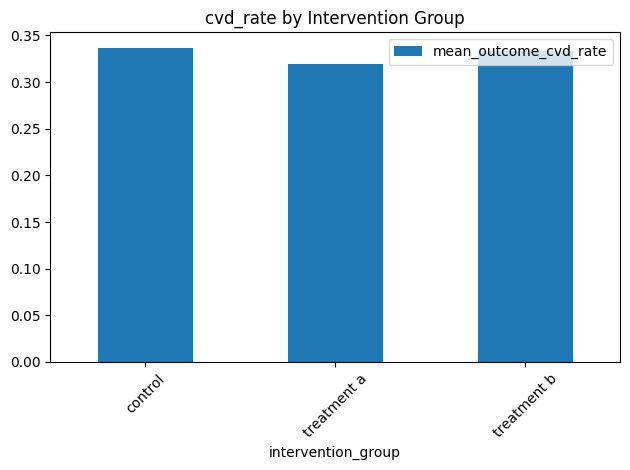

<Figure size 1000x600 with 0 Axes>

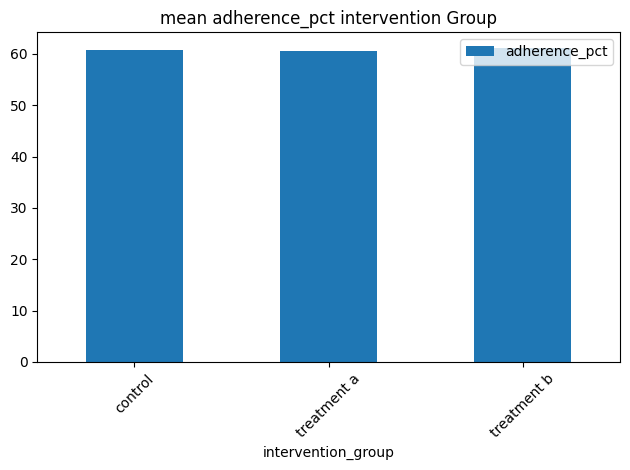

<Axes: title={'center': 'Dropout Counts by Intervention Group'}, xlabel='intervention_group'>

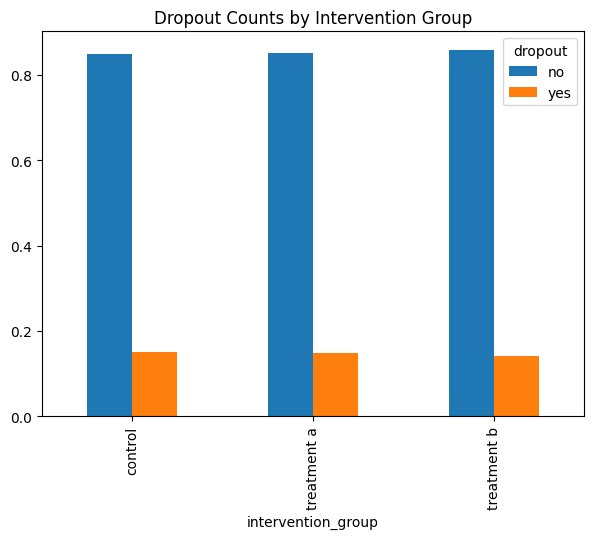

In [9]:
# TODO: Visualization

plot_group_comparison(pd.DataFrame(cvd_rate), "intervention_group", "mean_outcome_cvd_rate", "cvd_rate by Intervention Group")

plot_group_comparison(pd.DataFrame(mean_adherence_pct_intervention), "intervention_group", "adherence_pct", "mean adherence_pct intervention Group")

dropout_crosstab.plot(
    kind="bar",
    title="Dropout Counts by Intervention Group",
    figsize=(7, 5),
)

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [10]:
# TODO: Save summary outputs
# Summary statistics by site 
statistics_by_site.to_csv('output/q7_site_summary.csv')
# Intervention group comparison
summary.round(2).to_csv('output/q7_intervention_comparison.csv')

# Text report with key findings → `output/q7_analysis_report.txt`

report = [
    "Final Report",
    "======================",
    "",
    "overall statistics by site:",
    statistics_by_site.to_string(),
    "",
    "Group by 'site' and apply multiple aggregations on age(mean, std, min, max), bmi(mean, std), and systolic_bp(mean, median):",
    summary.round(2).to_string(),
    "",
    "Cross-tabulation of intervention_group vs dropout status:",
    dropout_crosstab.round(2).to_string(),
    "",
    "1. When grouped by site, Site D shows the highest mean age and the average BMI is consistent across all different site.",
    "2. The dropout condition and adherence_pct is similar across all the intervention groups.",
    "3. The treatment a group got the lowest mean rate of CVD.",

]

with open("output/q7_analysis_report.txt", "w") as f:
    f.write("\n".join(report))

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. When grouped by site, Site D shows the highest mean age and the average BMI is consistent across all different site.
2. The dropout condition and adherence_pct is similar across all the intervention groups.
3. The treatment a group got the lowest mean rate of CVD.
